#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=e79ef8b5cb3c974c682ca813dff303693f464f08303465760fe437b273afa1dc
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


## Importing the libraries


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [18]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [25]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


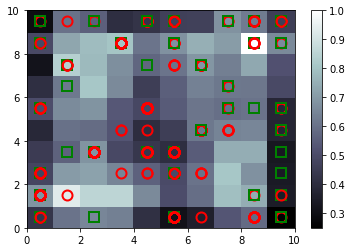

In [26]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [28]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,9)], mappings[(1,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [29]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15587297
15682540
15594133
15571081
15625501
15658504
15569595
15587443
15665181
15583724


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [30]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [31]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [33]:
import tensorflow as tf
tf.__version__

'2.4.0'

## Initializing the ANN

In [34]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [37]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [38]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 1.0993 - accuracy: 0.3068
Epoch 2/10
690/690 [==============================] - 1s 821us/step - loss: 0.4894 - accuracy: 0.9139
Epoch 3/10
690/690 [==============================] - 1s 832us/step - loss: 0.3048 - accuracy: 0.9895
Epoch 4/10
690/690 [==============================] - 1s 850us/step - loss: 0.2198 - accuracy: 0.9872
Epoch 5/10
690/690 [==============================] - 1s 837us/step - loss: 0.1669 - accuracy: 0.9872
Epoch 6/10
690/690 [==============================] - 1s 852us/step - loss: 0.1249 - accuracy: 0.9918
Epoch 7/10
690/690 [==============================] - 1s 823us/step - loss: 0.1240 - accuracy: 0.9831
Epoch 8/10
690/690 [==============================] - 1s 824us/step - loss: 0.0936 - accuracy: 0.9895
Epoch 9/10
690/690 [==============================] - 1s 831us/step - loss: 0.0887 - accuracy: 0.9871
Epoch 10/10
690/690 [==============================] - 1s 870us/step - loss: 0.0963 

## Predicting test set results

In [43]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [44]:
print(y_pred)

[[1.57761560e+07 3.96063328e-02]
 [1.57610470e+07 3.96063328e-02]
 [1.56712930e+07 3.96063328e-02]
 ...
 [1.56921370e+07 1.36381924e-01]
 [1.55695950e+07 1.67768657e-01]
 [1.56585040e+07 1.90685928e-01]]
